In [1]:
#IMPORT LIBRARIES NEEDED FOR ANALYSIS

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as sm

In [2]:
df = pd.read_excel("IBM Employee Attrition.xlsx")
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,2061,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,2062,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2064,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,Sales,2,3,Medical,2065,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [3]:
#replacing "Yes" & "No" with integer values for statistical measures later on with scipy.stats

df["Attrition"].replace(["Yes","No"],[1,0], inplace=True) #1 means YES, the IBM employee left work, #0 means the ibm employee stayed at and work for the company
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,Research & Development,23,2,Medical,2061,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,Research & Development,6,1,Medical,2062,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,Research & Development,4,3,Life Sciences,2064,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,Sales,2,3,Medical,2065,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [4]:
df.shape

(1470, 30)

In [5]:
df.count()

Age                         1470
Attrition                   1470
BusinessTravel              1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
NumCompaniesWorked          1470
Over18                      1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBalance             1470
YearsAtCompany              1470
YearsInCurrentRole          1470
YearsSinceLastPromotion     1470
YearsWithCurrManager        1470
dtype: int

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [7]:
df.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,9.192517,2.912925,1024.865306,2.721769,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,8.106864,1.024165,602.024335,1.093082,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,491.250000,2.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,1020.500000,3.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,14.000000,4.000000,1555.750000,4.000000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [10]:
df.corr()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,-0.001686,0.208034,-0.010145,0.010146,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.077924,-0.031373,-0.010577,-0.103369,-0.130016,-0.169105,-0.103481,-0.159840,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DistanceFromHome,-0.001686,0.077924,1.000000,0.021042,0.032916,-0.016075,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.021042,1.000000,0.042070,-0.027128,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.010577,0.032916,0.042070,1.000000,0.017621,-0.006888,-0.018519,-0.046247,-0.014829,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,-0.016075,-0.027128,0.017621,1.000000,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
JobInvolvement,0.029820,-0.130016,0.008783,0.042438,-0.006888,-0.008278,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.005303,0.101589,-0.018519,0.001212,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.103481,-0.003669,-0.011296,-0.046247,-0.006784,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,-0.159840,-0.017014,0.094961,-0.014829,-0.006259,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<AxesSubplot:>

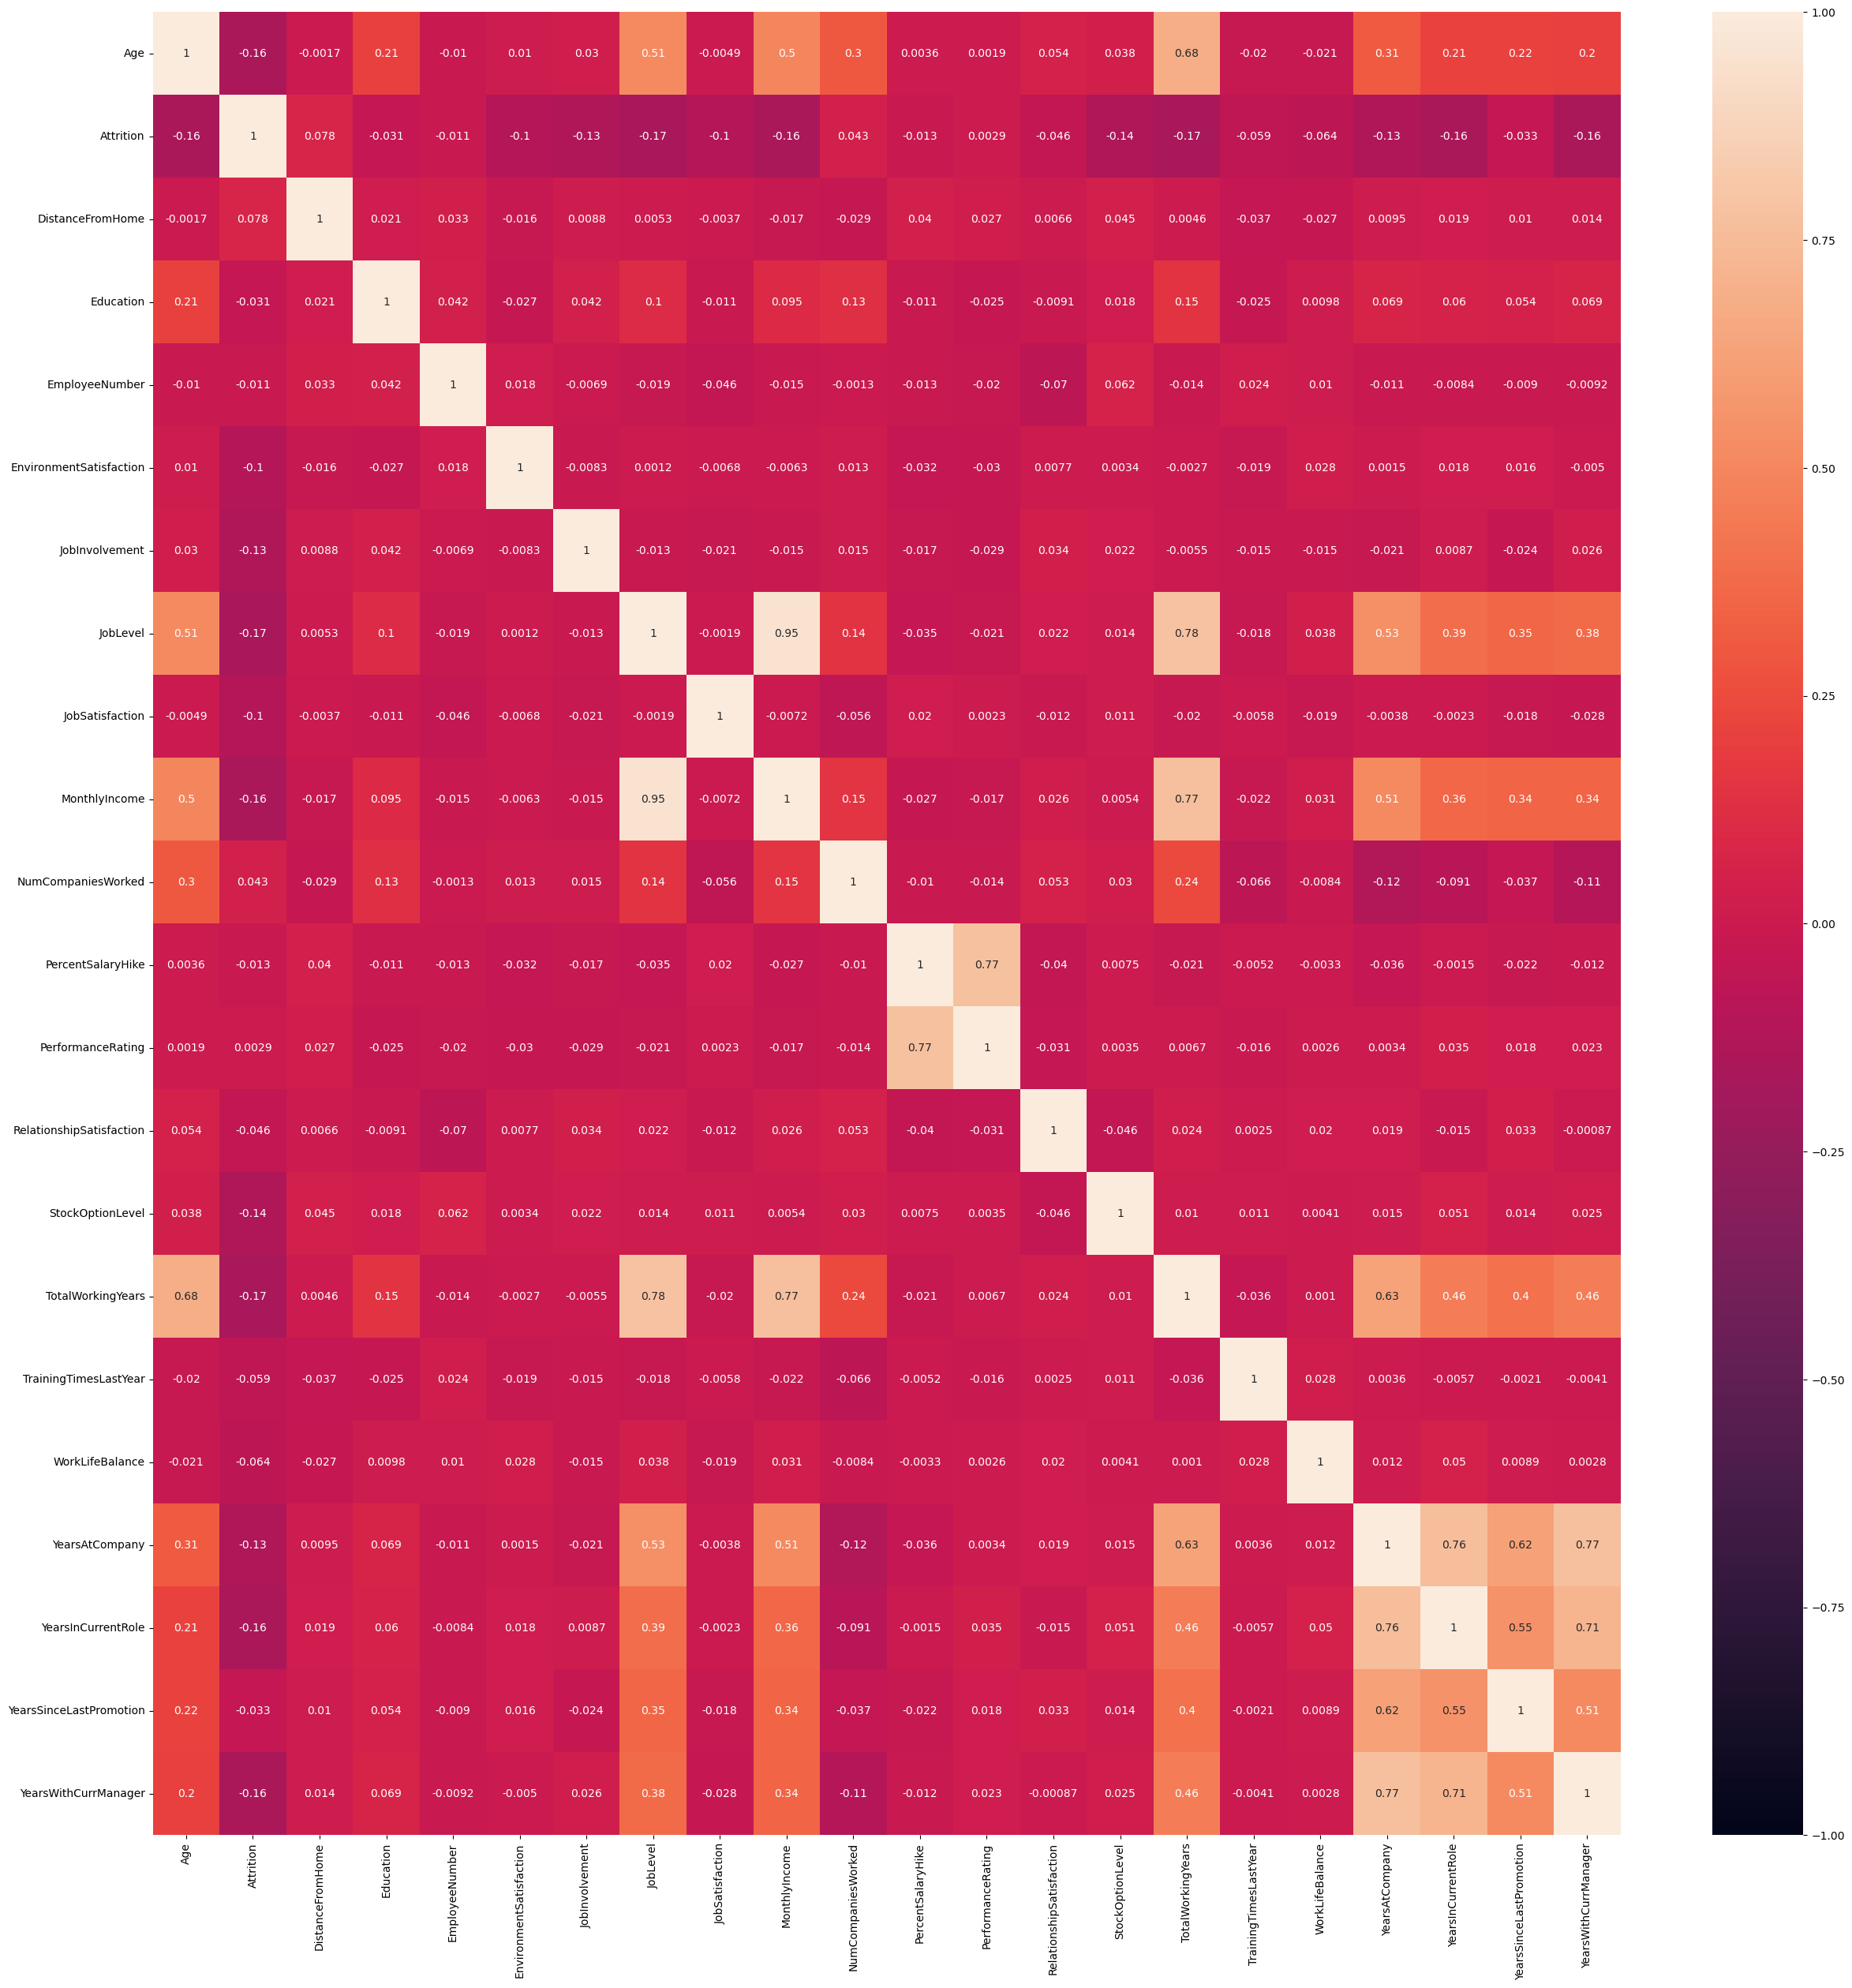

In [11]:
# show correlation of stats via heatmap
plt.figure(figsize=(30,30))

# calculate the correlation matrix for the numeric dataset 
corr = df.corr()

# plot a heat map to show the magnitude of the correlation between variables
sns.heatmap(corr, vmin = -1, annot = True)

In [12]:
#Create copy of the dataframe before start checking for outliers on variables being tested
dfz = df.copy()

In [13]:
dfz.shape

(1470, 30)

In [14]:
dfz

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,Research & Development,23,2,Medical,2061,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,Research & Development,6,1,Medical,2062,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,Research & Development,4,3,Life Sciences,2064,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,Sales,2,3,Medical,2065,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [15]:
##Possible variables that have a correlation with work attrition according to correlation percentages.##
#1. "JobLevel"
#2. "TotalWorkingYears"
#3. "YearsAtCompany"
#4. "YearsInCurrentRole" 
#5. "YearsWithCurrManager"

##Other variables I can draw insight on for work attrition for IBC company##
#6. "JobSatisfaction"
#7. "NumCompaniesWorked"
#8. "Overtime"
#9. "PercentSalaryHike"
#10. "PerforamceRating"
#11. "RelationshipSatisfaction"
#12. "WorkLifeBalance"

In [16]:
dfz["zscore_JobLevel"] = np.abs(stats.zscore(dfz["JobLevel"]))
dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_JobLevel
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,1,0,8,0,1,6,4,0,5,0.057788
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,1,10,3,3,10,7,1,7,0.057788
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,2,0,7,3,3,0,0,0,0,0.961486
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,0,8,3,3,8,7,3,0,0.961486
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,4,1,6,3,3,2,2,2,2,0.961486


In [17]:
z_outliers = dfz.loc[dfz["zscore_JobLevel"] > 3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [18]:
df.iloc[[25,   29,   45,   62,  105,  106,  123,  165,  186,  187,  190,
             231,  233,  237,  244,  257,  270,  279,  290,  326,  329,  392,
             400,  411,  417,  473,  477,  497,  535,  538,  568,  584,  595,
             716,  741,  746,  749,  766,  770,  814,  851,  858,  869,  898,
             899,  904,  907,  913,  916,  918,  922,  936,  955,  956, 1009,
            1116, 1126, 1129, 1140, 1154, 1242, 1264, 1277, 1330, 1331, 1377,
            1401, 1437, 1443]]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
25,53,0,Travel_Rarely,Research & Development,5,3,Other,32,3,Female,...,3,4,1,26,3,2,14,13,4,8
29,46,0,Travel_Rarely,Sales,2,4,Marketing,38,2,Female,...,3,4,0,22,2,2,2,2,2,1
45,41,1,Travel_Rarely,Research & Development,12,3,Technical Degree,58,2,Female,...,3,4,0,23,0,3,22,15,15,8
62,50,0,Travel_Rarely,Research & Development,7,2,Medical,80,2,Female,...,3,4,1,29,2,2,27,3,13,8
105,59,0,Non-Travel,Human Resources,2,4,Human Resources,140,3,Female,...,4,4,1,30,3,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,48,0,Travel_Rarely,Research & Development,10,3,Life Sciences,1867,4,Male,...,3,4,0,29,3,3,22,10,12,9
1377,49,0,Travel_Frequently,Research & Development,2,1,Life Sciences,1941,2,Male,...,3,4,0,28,3,3,5,4,4,3
1401,55,0,Travel_Rarely,Human Resources,26,4,Human Resources,1973,3,Male,...,3,1,1,35,0,3,10,9,1,4
1437,39,0,Non-Travel,Research & Development,9,3,Life Sciences,2022,4,Male,...,3,3,0,21,3,2,6,0,1,3


In [19]:
dfz = dfz.drop(z_outliers)
print(dfz.shape)

(1470, 31)


In [20]:
dfz["zscore_TotalWorkingYears"] = np.abs(stats.zscore(dfz["TotalWorkingYears"]))
dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_JobLevel,zscore_TotalWorkingYears
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,0,8,0,1,6,4,0,5,0.057788,0.421642
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,1,10,3,3,10,7,1,7,0.057788,0.164511
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,0,7,3,3,0,0,0,0,0.961486,0.550208
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,0,8,3,3,8,7,3,0,0.961486,0.421642
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,1,6,3,3,2,2,2,2,0.961486,0.678774


In [21]:
z_outliers = dfz.loc[dfz["zscore_TotalWorkingYears"] > 3].index
print(z_outliers)

Int64Index([  85,   98,  126,  187,  270,  401,  445,  595,  624,  894,  956,
            1043, 1116, 1184, 1301, 1401],
           dtype='int64')


In [22]:
dfz.iloc[[85,   98,  126,  401,  424,  445,  534,  561,  624,  649,  714,
             867,  890,  894,  914,  962,  976, 1043, 1086, 1111, 1138, 1184,
            1301]]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_JobLevel,zscore_TotalWorkingYears
85,56,0,Travel_Rarely,Research & Development,7,3,Life Sciences,112,4,Male,...,0,37,3,2,6,4,0,2,0.845911,3.306758
98,58,0,Travel_Rarely,Sales,10,4,Medical,131,4,Male,...,0,38,1,2,37,10,1,8,1.749610,3.435323
126,58,1,Travel_Rarely,Research & Development,23,4,Medical,165,4,Female,...,1,40,3,2,40,10,15,6,0.845911,3.692454
401,56,0,Travel_Frequently,Sales,6,3,Life Sciences,532,3,Female,...,3,36,0,2,7,7,7,7,1.749610,3.178192
424,57,0,Travel_Rarely,Sales,29,3,Marketing,568,1,Male,...,1,32,3,2,1,0,0,0,1.749610,2.663930
445,55,0,Travel_Rarely,Sales,18,5,Life Sciences,597,1,Female,...,0,37,2,3,10,9,7,7,1.749610,3.306758
534,53,0,Travel_Rarely,Research & Development,7,3,Life Sciences,730,3,Male,...,0,32,3,3,5,1,1,3,1.749610,2.663930
561,52,0,Travel_Rarely,Sales,3,4,Marketing,776,3,Male,...,0,34,3,4,34,6,1,16,1.749610,2.921061
624,53,0,Travel_Rarely,Sales,7,2,Marketing,862,1,Female,...,1,35,3,3,5,2,0,4,0.845911,3.049627
649,53,0,Travel_Rarely,Research & Development,23,4,Life Sciences,901,4,Female,...,0,33,0,3,12,9,3,8,1.749610,2.792496


In [23]:
dfz = dfz.drop(z_outliers)
print(dfz.shape)

(1454, 32)


In [24]:
dfz["zscore_YearsAtCompany"] = np.abs(stats.zscore(dfz["YearsAtCompany"]))
dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_JobLevel,zscore_TotalWorkingYears,zscore_YearsAtCompany
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,8,0,1,6,4,0,5,0.057788,0.421642,0.149908
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,10,3,3,10,7,1,7,0.057788,0.164511,0.529116
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,7,3,3,0,0,0,0,0.961486,0.550208,1.168445
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,8,3,3,8,7,3,0,0.961486,0.421642,0.189604
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,6,3,3,2,2,2,2,0.961486,0.678774,0.828933


In [25]:
z_outliers = dfz.loc[dfz["zscore_YearsAtCompany"] > 3].index
print(z_outliers)

Int64Index([  18,   62,  119,  190,  237,  390,  411,  425,  473,  477,  561,
             592,  653,  677,  749,  861,  914,  918,  922,  962, 1086, 1111,
            1135, 1138],
           dtype='int64')


In [26]:
dfz.iloc[[18,   28,   90,  119,  178,  300,  311,  390,  425,  544,  592,
             653,  677,  799,  861, 1135, 1221, 1223, 1295, 1303, 1351]]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_JobLevel,zscore_TotalWorkingYears,zscore_YearsAtCompany
18,53,0,Travel_Rarely,Sales,2,4,Life Sciences,23,1,Female,...,31,3,3,25,8,3,7,1.749610,2.535365,3.075457
28,44,0,Travel_Rarely,Research & Development,7,4,Medical,36,1,Female,...,24,4,3,22,6,5,17,0.845911,1.635406,2.566188
91,51,0,Travel_Rarely,Sales,21,4,Marketing,120,3,Male,...,11,2,1,10,7,1,0,0.057788,0.035946,0.529116
121,33,0,Non-Travel,Sales,22,2,Marketing,160,3,Male,...,8,2,4,7,7,0,7,0.057788,0.421642,0.019848
181,34,0,Travel_Rarely,Research & Development,27,2,Medical,247,4,Female,...,9,3,3,3,2,1,2,0.961486,0.293077,0.659177
305,36,0,Non-Travel,Research & Development,24,4,Life Sciences,419,2,Female,...,11,3,3,9,8,0,8,0.057788,0.035946,0.359360
316,49,0,Travel_Rarely,Research & Development,1,2,Technical Degree,431,3,Female,...,25,2,3,7,1,0,7,1.749610,1.763972,0.019848
395,43,0,Travel_Frequently,Research & Development,21,3,Medical,525,4,Male,...,8,1,3,3,2,1,2,0.961486,0.421642,0.659177
431,54,0,Travel_Rarely,Research & Development,8,4,Life Sciences,578,3,Female,...,19,3,3,1,0,0,0,0.057788,0.992578,0.998689
551,39,0,Travel_Rarely,Human Resources,3,3,Human Resources,760,3,Female,...,12,3,1,8,3,3,6,0.057788,0.092620,0.189604


In [27]:
dfz = dfz.drop(z_outliers)
print(dfz.shape)

(1430, 33)


In [28]:
dfz["zscore_YearsInCurrentRole"] = np.abs(stats.zscore(dfz["YearsInCurrentRole"]))
dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_JobLevel,zscore_TotalWorkingYears,zscore_YearsAtCompany,zscore_YearsInCurrentRole
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,0,1,6,4,0,5,0.057788,0.421642,0.149908,0.029817
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,3,3,10,7,1,7,0.057788,0.164511,0.529116,0.817290
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,3,0,0,0,0,0.961486,0.550208,1.168445,1.159292
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,8,7,3,0,0.961486,0.421642,0.189604,0.817290
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,3,2,2,2,2,0.961486,0.678774,0.828933,0.594554


In [29]:
z_outliers = dfz.loc[dfz["zscore_YearsInCurrentRole"] > 3].index
print(z_outliers)

Int64Index([  45,   63,  123,  231,  281,  417,  466,  716,  746,  976, 1024,
            1150, 1156, 1221, 1327, 1351, 1430],
           dtype='int64')


In [30]:
dfz.loc[[ 45,   63,  123,  231,  281,  417,  466,  716,  746,  976, 1024,
            1150, 1156, 1221, 1327, 1351, 1430]]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_JobLevel,zscore_TotalWorkingYears,zscore_YearsAtCompany,zscore_YearsInCurrentRole
45,41,1,Travel_Rarely,Research & Development,12,3,Technical Degree,58,2,Female,...,0,3,22,15,15,8,2.653309,1.506840,2.566188,3.076240
63,59,0,Travel_Rarely,Sales,25,3,Life Sciences,81,1,Female,...,3,2,21,16,7,9,0.845911,2.149668,2.396432,3.358609
123,51,0,Travel_Rarely,Research & Development,6,3,Life Sciences,162,1,Male,...,5,3,20,18,15,15,2.653309,1.506840,2.226676,3.923346
231,42,0,Travel_Rarely,Research & Development,4,2,Technical Degree,319,3,Male,...,3,3,22,17,11,15,2.653309,1.378275,2.566188,3.640977
281,42,0,Travel_Rarely,Sales,1,1,Life Sciences,387,2,Male,...,3,3,20,16,11,6,0.057788,1.121144,2.226676,3.358609
417,40,0,Travel_Rarely,Sales,2,4,Life Sciences,558,3,Female,...,2,3,20,15,1,12,2.653309,1.249709,2.226676,3.076240
466,41,0,Travel_Rarely,Sales,2,5,Life Sciences,625,2,Female,...,2,3,18,16,11,8,1.749610,1.378275,1.887164,3.358609
716,41,0,Travel_Frequently,Research & Development,9,3,Medical,999,1,Male,...,2,4,18,16,0,11,2.653309,1.249709,1.887164,3.358609
746,41,0,Non-Travel,Research & Development,7,1,Life Sciences,1035,2,Female,...,3,3,21,16,5,10,2.653309,1.249709,2.396432,3.358609
976,56,0,Travel_Rarely,Research & Development,23,3,Life Sciences,1373,4,Male,...,0,3,19,16,15,9,1.749610,2.792496,2.056920,3.358609


In [31]:
dfz = dfz.drop(z_outliers)
print(dfz.shape)

(1413, 34)


In [32]:
dfz["zscore_YearsWithCurrManager"] = np.abs(stats.zscore(dfz["YearsWithCurrManager"]))
dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_JobLevel,zscore_TotalWorkingYears,zscore_YearsAtCompany,zscore_YearsInCurrentRole,zscore_YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,1,6,4,0,5,0.057788,0.421642,0.149908,0.029817,0.311154
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,3,10,7,1,7,0.057788,0.164511,0.529116,0.817290,0.893101
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,0,0,0,0,0.961486,0.550208,1.168445,1.159292,1.143713
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,8,7,3,0,0.961486,0.421642,0.189604,0.817290,1.143713
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,2,2,2,2,0.961486,0.678774,0.828933,0.594554,0.561766


In [33]:
z_outliers = dfz.loc[dfz["zscore_YearsWithCurrManager"] > 3].index
print(z_outliers)

Int64Index([28, 153, 386, 616, 635, 686, 875, 926, 1078, 1348], dtype='int64')


In [34]:
dfz.iloc[[28, 153, 386, 616, 635, 686, 875, 926, 1078, 1348]]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_JobLevel,zscore_TotalWorkingYears,zscore_YearsAtCompany,zscore_YearsInCurrentRole,zscore_YearsWithCurrManager
29,46,0,Travel_Rarely,Sales,2,4,Marketing,38,2,Female,...,2,2,2,2,1,2.653309,1.378275,0.828933,0.594554,0.852739
162,28,0,Travel_Rarely,Research & Development,21,3,Medical,221,3,Male,...,1,5,2,0,2,0.961486,0.807339,0.319664,0.594554,0.561766
403,41,0,Travel_Rarely,Sales,1,3,Marketing,534,2,Male,...,3,10,7,0,7,0.845911,0.164511,0.529116,0.817290,0.893101
644,31,0,Travel_Rarely,Research & Development,11,4,Life Sciences,895,4,Male,...,3,6,4,0,2,0.961486,0.421642,0.149908,0.029817,0.561766
664,36,0,Travel_Rarely,Research & Development,14,1,Life Sciences,924,3,Male,...,2,16,8,4,11,0.057788,0.735447,1.547652,1.099659,2.056995
717,27,0,Travel_Rarely,Research & Development,16,4,Technical Degree,1001,3,Female,...,3,2,2,2,2,0.961486,0.935905,0.828933,0.594554,0.561766
910,23,0,Travel_Rarely,Research & Development,1,2,Life Sciences,1270,4,Male,...,3,1,0,0,1,0.961486,1.321601,0.998689,1.159292,0.852739
966,58,1,Travel_Rarely,Research & Development,7,4,Medical,1360,3,Female,...,2,10,9,5,9,0.845911,2.535365,0.529116,1.382027,1.475048
1124,39,0,Travel_Rarely,Sales,6,3,Medical,1588,4,Male,...,3,7,6,7,6,0.845911,0.035946,0.019848,0.534921,0.602128
1404,42,0,Non-Travel,Research & Development,23,2,Life Sciences,1976,4,Male,...,3,20,9,3,7,0.057788,1.121144,2.226676,1.382027,0.893101


In [35]:
dfz = dfz.drop(z_outliers)
print(dfz.shape)

(1403, 35)


In [36]:
mod1 = sm.logit('Attrition ~ JobLevel + TotalWorkingYears + YearsAtCompany + YearsInCurrentRole + YearsWithCurrManager', data=df).fit()

mod1.summary()

Optimization terminated successfully.
         Current function value: 0.415315
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1464
Method:                           MLE   Df Model:                            5
Date:                Sat, 06 May 2023   Pseudo R-squ.:                 0.05972
Time:                        04:56:15   Log-Likelihood:                -610.51
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 2.720e-15
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.4793      0.162     -2.958      0.003      -0.797      -0.162
JobLevel                -0.2996      0.122     -2.465      0.014      -0.538      -0.061
TotalWorkingYears       -0.0352      0.019     -1.849      0.064      -0.073       0.002
YearsAtCompany           0.0777      0.028      2.766      0.006       0.023       0.133
YearsInCurrentRole      -0.1083      0.038     -2.850      0.004      -0.183      -0.034
YearsWithCurrManager    -0.0977      0.038     -2.542      0.011      -0.173      -0.022
========================================================================================
"""

In [37]:
##Coefficient Interpretations

mod1.params

Intercept              -0.479287
JobLevel               -0.299589
TotalWorkingYears      -0.035219
YearsAtCompany          0.077651
YearsInCurrentRole     -0.108290
YearsWithCurrManager   -0.097739
dtype: float64

In [38]:
##Odds Ratio (OR)

#An Odds Ratio (OR) is a measure of association between an event and an outcome. The OR represents the odds that an outcome will occur given a specific event/exposure, compared to the odds of the outcome occuring without the event/exposure. We can convert our model coefficients to odds ratios which will be easier to interpret.

#* OR > 1 indicates increased occurrence of an event
#* OR < 1 indicates decreased occurrence of an event 

dfz_odds = pd.DataFrame(np.exp(mod1.params), columns = ['OR'])

## pull the pvalues directly from the model

dfz_odds["pvalue"] = mod1.pvalues

## create a variable to quickly determine sig

dfz_odds["Sig"] = np.where(dfz_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

dfz_odds

,OR,pvalue,Sig
Intercept,0.619225,0.003092,Sig
JobLevel,0.741122,0.013687,Sig
TotalWorkingYears,0.965394,0.064484,Not Sig
YearsAtCompany,1.080745,0.005673,Sig
YearsInCurrentRole,0.897367,0.004369,Sig
YearsWithCurrManager,0.906885,0.011028,Sig


In [39]:
dfz_odds["Pct Change"] = (dfz_odds["OR"] - 1) * 100

dfz_odds

,OR,pvalue,Sig,Pct Change
Intercept,0.619225,0.003092,Sig,-38.077520
JobLevel,0.741122,0.013687,Sig,-25.887757
TotalWorkingYears,0.965394,0.064484,Not Sig,-3.460616
YearsAtCompany,1.080745,0.005673,Sig,8.074548
YearsInCurrentRole,0.897367,0.004369,Sig,-10.263281
YearsWithCurrManager,0.906885,0.011028,Sig,-9.311466


In [40]:
dfz["Attrition"].groupby(dfz["YearsWithCurrManager"]).mean()

YearsWithCurrManager
0     0.325670
1     0.144737
2     0.145773
3     0.133803
4     0.115789
5     0.129032
6     0.115385
7     0.150485
8     0.080000
9     0.074074
10    0.136364
11    0.050000
12    0.000000
13    0.000000
14    0.500000
Name: Attrition, dtype: float64

In [41]:
pd.crosstab(dfz["Attrition"],dfz["YearsWithCurrManager"], margins=True,normalize=False)

YearsWithCurrManager,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,All
Attrition,,,,,,,,,,,,,,,,
0,176,65,293,123,84,27,23,175,92,50,19,19,13,10,2,1171
1,85,11,50,19,11,4,3,31,8,4,3,1,0,0,2,232
All,261,76,343,142,95,31,26,206,100,54,22,20,13,10,4,1403


In [42]:
#My first recommendation to HR according to the data being represented attrition and YearswithCurrManager would be:
#1. do private consultations with clients on a quarterly basis and ask what can be done to promote/increase work relationship with their manager
#2. have the managers take leadership courses to help them improve their employee relationships and increase worker retention.

Text(0.5, 1.0, 'IBM Work Attrition by YearsWithCurrManager')

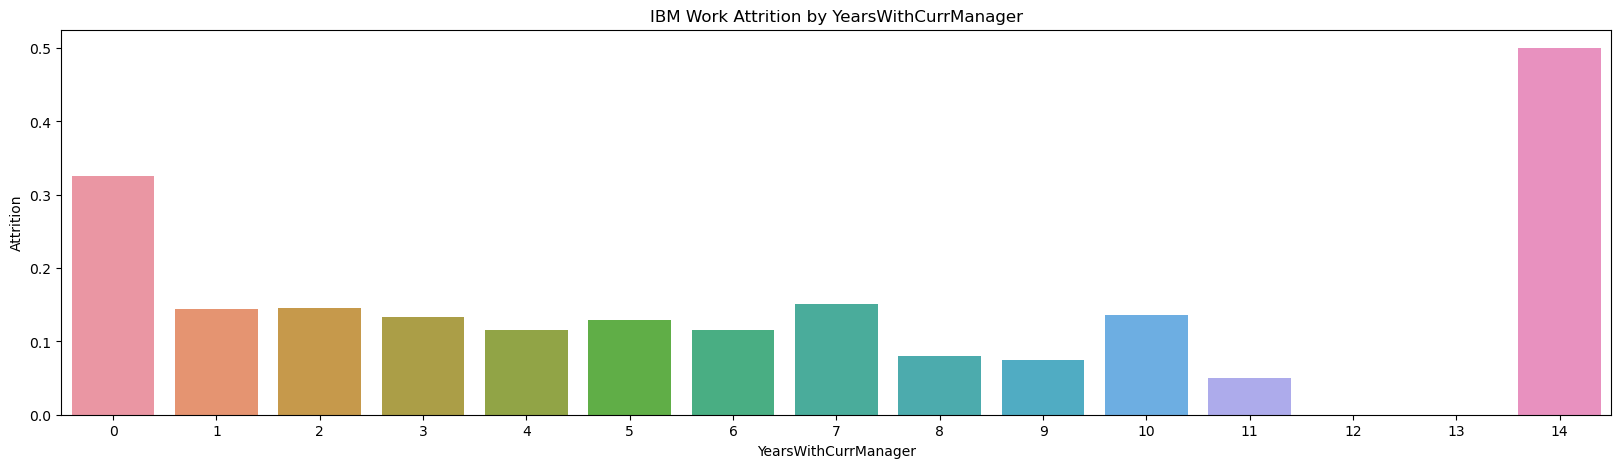

In [43]:
plt.figure(figsize=(20,5))

sns.barplot(data = dfz, x = "YearsWithCurrManager", y = "Attrition", ci = False) #we can also take off the CI to explore/illustrate the confidence interval estimation

plt.xticks(rotation = 360)
plt.title('IBM Work Attrition by YearsWithCurrManager')

Text(0.5, 1.0, 'IBM Work Attrition by YearsWithCurrManager')

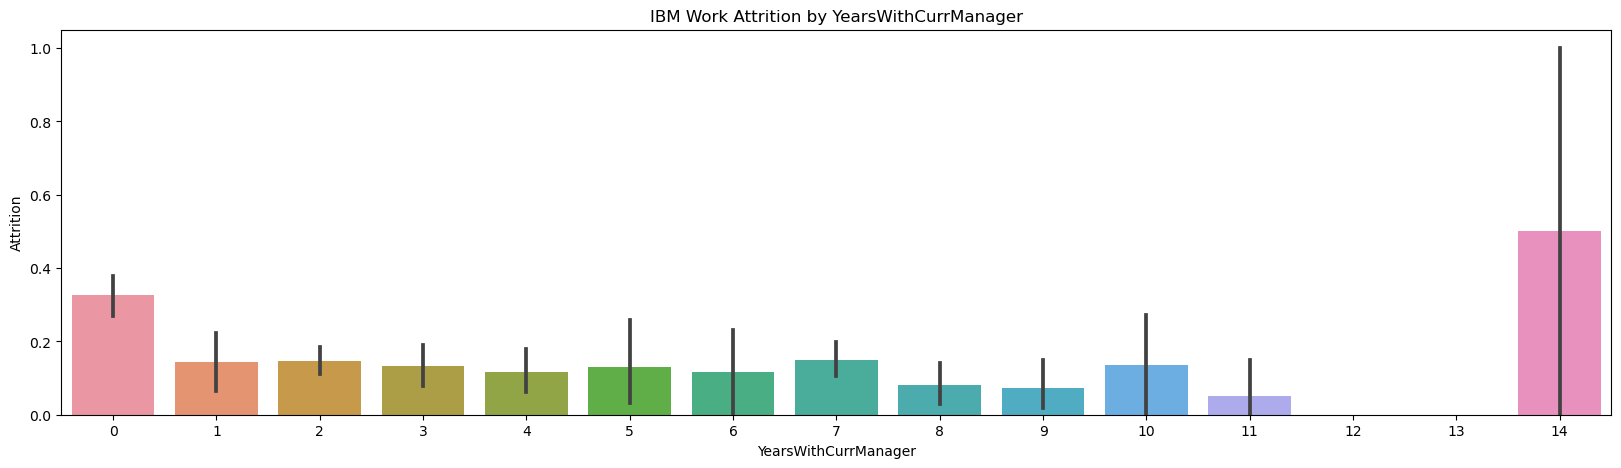

In [44]:
plt.figure(figsize=(20,5))

sns.barplot(data = dfz, x = "YearsWithCurrManager", y = "Attrition") #we can also take off the CI to explore/illustrate the confidence interval estimation

plt.xticks(rotation = 360)
plt.title('IBM Work Attrition by YearsWithCurrManager')

In [45]:
dfz["Attrition"].groupby(dfz["YearsInCurrentRole"]).mean()

YearsInCurrentRole
0     0.300412
1     0.192982
2     0.183288
3     0.120301
4     0.145631
5     0.028571
6     0.066667
7     0.138889
8     0.083333
9     0.105263
10    0.043478
11    0.000000
12    0.111111
13    0.076923
14    0.000000
Name: Attrition, dtype: float64

In [46]:
pd.crosstab(dfz["Attrition"],dfz["YearsInCurrentRole"], margins=True,normalize=False)

YearsInCurrentRole,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,All
Attrition,,,,,,,,,,,,,,,,
0,170,46,303,117,88,34,28,186,77,51,22,21,8,12,8,1171
1,73,11,68,16,15,1,2,30,7,6,1,0,1,1,0,232
All,243,57,371,133,103,35,30,216,84,57,23,21,9,13,8,1403


In [47]:
##My second recommendation to HR according to the data being represented attrition and YearsInCurrentRole would be:
#have the new employees check in with the HR department on a quarterly basis for the next 3 years and provide feedback on whats causing stress and burnout on thier roles and how the HR department can assist them with available resources in their disposal.

Text(0.5, 1.0, 'IBM Work Attrition by YearsInCurrentRole')

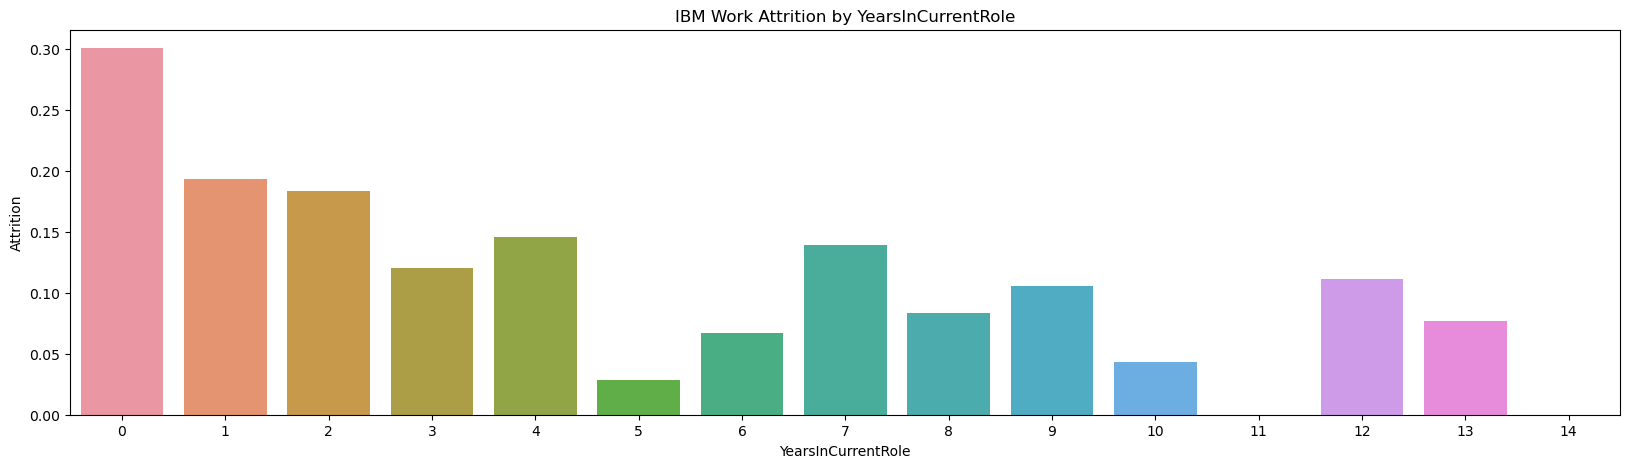

In [48]:
plt.figure(figsize=(20,5))

sns.barplot(data = dfz, x = "YearsInCurrentRole", y = "Attrition", ci = False) #we can also take off the CI to explore/illustrate the confidence interval estimation

plt.xticks(rotation = 360)
plt.title('IBM Work Attrition by YearsInCurrentRole')

In [49]:
dfz["Attrition"].groupby(dfz["YearsAtCompany"]).mean()

YearsAtCompany
0     0.363636
1     0.345029
2     0.212598
3     0.156250
4     0.172727
5     0.107692
6     0.120000
7     0.125000
8     0.112500
9     0.098765
10    0.155172
11    0.062500
12    0.000000
13    0.083333
14    0.111111
15    0.050000
16    0.100000
17    0.142857
18    0.142857
19    0.125000
20    0.050000
21    0.090909
22    0.000000
23    1.000000
24    0.200000
Name: Attrition, dtype: float64

In [50]:
pd.crosstab(dfz["Attrition"], dfz["YearsAtCompany"], margins=True, normalize=False)

YearsAtCompany,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,All
Attrition,,,,,,,,,,,,,,,,,,,,,
0,28,112,100,108,91,174,66,77,71,73,...,9,6,6,7,19,10,11,0,4,1171
1,16,59,27,20,19,21,9,11,9,8,...,1,1,1,1,1,1,0,1,1,232
All,44,171,127,128,110,195,75,88,80,81,...,10,7,7,8,20,11,11,1,5,1403


In [51]:
##My third recommendation to HR according to the data being represented on attrition and YearsAtCompany would be:
#HR department needs to give a incentive such as bonuses base on perforamance on the to reduce work attrition.

Text(0.5, 1.0, 'IBM Work Attrition by YearsAtCompany')

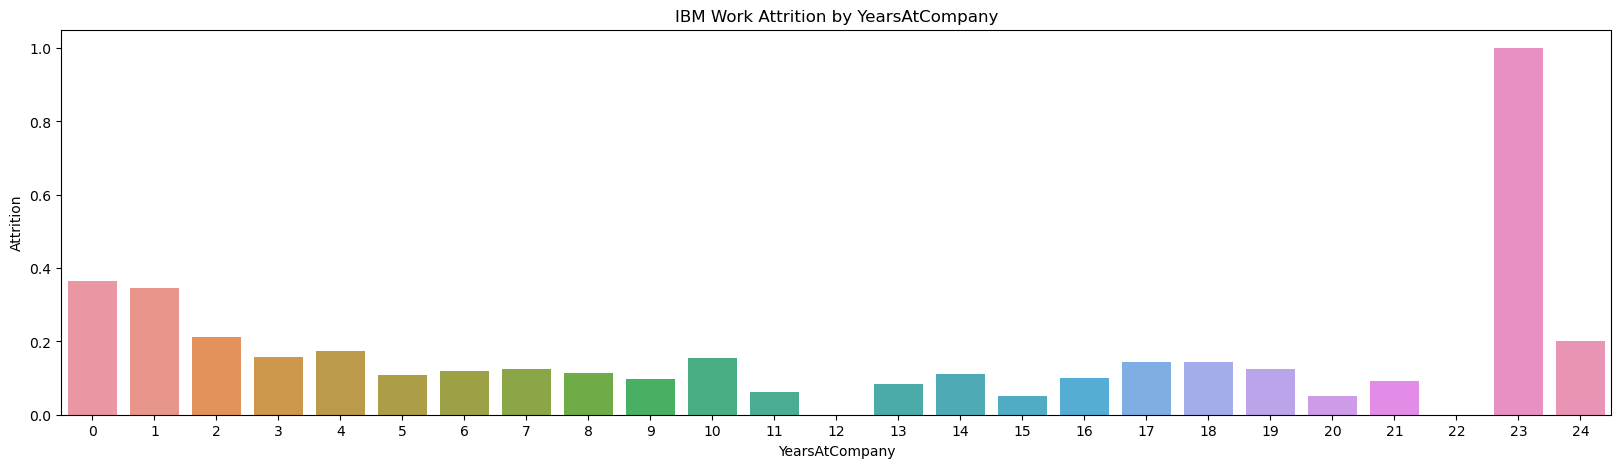

In [52]:
plt.figure(figsize=(20,5))

sns.barplot(data = dfz, x = "YearsAtCompany", y = "Attrition", ci = False) #we can also take off the CI to explore/illustrate the confidence interval estimation

plt.xticks(rotation = 360)
plt.title('IBM Work Attrition by YearsAtCompany')

In [53]:
dfz["Attrition"].groupby(dfz["JobLevel"]).mean()

JobLevel
1    0.264325
2    0.098113
3    0.145631
4    0.064103
5    0.041667
Name: Attrition, dtype: float64

In [54]:
pd.crosstab(dfz["Attrition"], dfz["JobLevel"], margins=True, normalize=False)

JobLevel,1,2,3,4,5,All
Attrition,,,,,,
0,398,478,176,73,46,1171
1,143,52,30,5,2,232
All,541,530,206,78,48,1403


In [55]:
##My fourth recommendation to HR according to the data being represented on attrition and YearsAtCompany would be:
#for the IBM employees on job level 1, HR needs to invest on having these employees attend a career improvment program to level up thier employee stats and move to the next stage of thier respective job/title to retain most of the IBM employees currently working on thier first year.
#moving up on the job level means increase pay, increase pto hours, benefits etc so the probability of ibm employees leaving work would be significanlty reduced.

Text(0.5, 1.0, 'IBM Work Attrition by JobLevel')

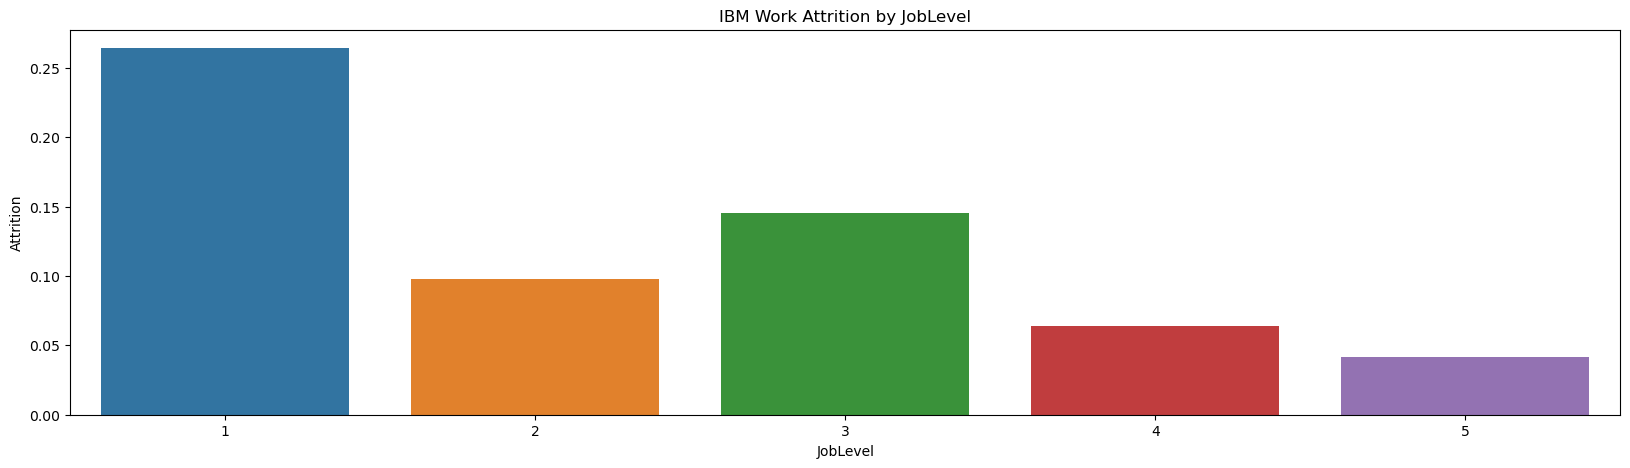

In [56]:
plt.figure(figsize=(20,5))

sns.barplot(data = dfz, x = "JobLevel", y = "Attrition", ci = False) #we can also take off the CI to explore/illustrate the confidence interval estimation

plt.xticks(rotation = 360)
plt.title('IBM Work Attrition by JobLevel')

In [57]:
dfz["Attrition"].groupby(dfz["TotalWorkingYears"]).mean()

TotalWorkingYears
0     0.454545
1     0.493827
2     0.290323
3     0.214286
4     0.190476
5     0.181818
6     0.176000
7     0.222222
8     0.155340
9     0.104167
10    0.123762
11    0.194444
12    0.104167
13    0.083333
14    0.129032
15    0.125000
16    0.083333
17    0.093750
18    0.160000
19    0.136364
20    0.080000
21    0.032258
22    0.111111
23    0.052632
24    0.200000
25    0.100000
26    0.090909
27    0.000000
28    0.090909
29    0.000000
30    0.000000
31    0.200000
32    0.000000
33    0.000000
34    0.000000
Name: Attrition, dtype: float64

In [58]:
pd.crosstab(dfz["Attrition"], dfz["TotalWorkingYears"], margins=True, normalize=False)

TotalWorkingYears,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,All
Attrition,,,,,,,,,,,,,,,,,,,,,
0,6,41,22,33,51,72,103,63,87,86,...,10,6,10,7,7,4,6,2,1,1171
1,5,40,9,9,12,16,22,18,16,10,...,1,0,1,0,0,1,0,0,0,232
All,11,81,31,42,63,88,125,81,103,96,...,11,6,11,7,7,5,6,2,1,1403


In [59]:
##Refer to my first recommendation for this one.

Text(0.5, 1.0, 'IBM Work Attrition by TotalWorkingYears')

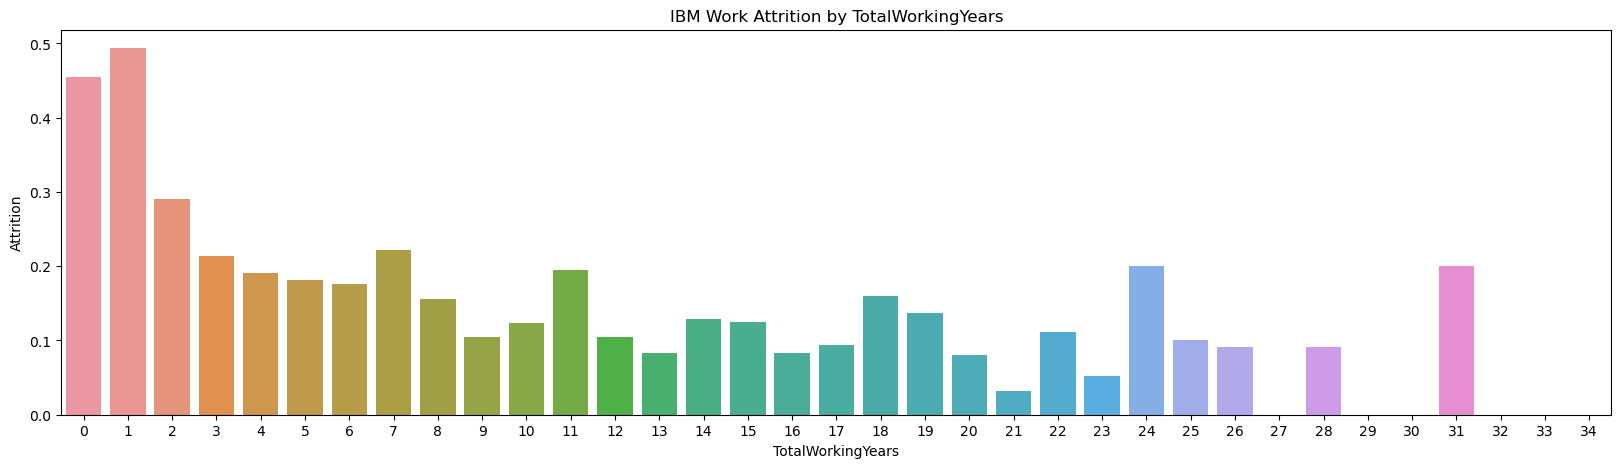

In [60]:
plt.figure(figsize=(20,5))

sns.barplot(data = dfz, x = "TotalWorkingYears", y = "Attrition", ci = False) #we can also take off the CI to explore/illustrate the confidence interval estimation

plt.xticks(rotation = 360)
plt.title('IBM Work Attrition by TotalWorkingYears')